No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


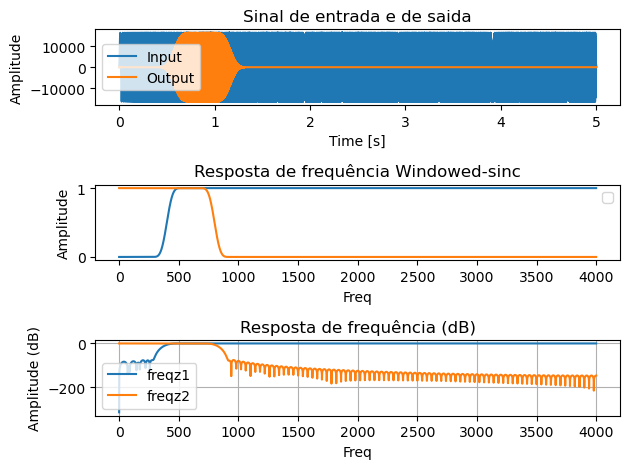

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

def gera_coef(M, Fc):
    # 0 to M
    i1 = np.arange(10 ** -9, M, 1.)

    # Eq diretamente 16-4
    h1 = (np.sin(2 * np.pi * Fc * (i1 - M / 2)) / (i1 - M / 2)) * (0.42 - 0.5 * np.cos(2 * np.pi * i1 / M) + 0.08 * np.cos(4 * np.pi * i1 / M))

    # normalize
    h1 = h1 / np.sum(h1)

    return h1

Fs = 8000

# definindo a frequencia de corte
Fc1 = 400/Fs
Fc2 = 800/Fs

M = 200

# filtro PA
hPA = gera_coef(M, Fc1)
hPA = -hPA
hPA[int(M/2)] += 1

# filtro PB
hPB = gera_coef(M, Fc2)

# filtro PF
hPF = np.convolve(hPA, hPB, mode="same")

# salva coeficientes
coefs_name = "coefPF.dat"
with open(coefs_name, 'w') as f:
    for d in hPF:
        f.write(str(d.astype(np.float16))+",\n")

read_path = "sweep.pcm"
with open(read_path, 'rb') as f:
    buf = f.read()
    data_i = np.frombuffer(buf, dtype='int16')
    data_len = len(data_i)

    # replica do arquivo lido para salvar o resultado
    data_o = np.convolve(hPF, data_i)
    data_o = data_o.astype(dtype='int16')


# amostra de 100 ms
t = np.arange(0, data_len/Fs, 1 / Fs)

# Plotando os gráficos
#Visualizando dados de entrada e saida
plt.subplot(3, 1, 1)
plt.title("Sinal de entrada e de saida")
plt.plot(t, data_i[: len(t)], label="Input")
plt.plot(t, data_o[: len(t)], label="Output")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


[w1, h1] = sf.freqz(hPA, worN = Fs, fs = Fs)
[w2, h2] = sf.freqz(hPB, worN = Fs, fs = Fs)

plt.subplot(3, 1, 2)
plt.title("Resposta de frequência Windowed-sinc")
plt.plot(w1, abs(h1))
plt.plot(w2, abs(h2))
plt.legend()
plt.xlabel("Freq")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.title("Resposta de frequência (dB)")
plt.plot(w1, 20 * np.log10(abs(h1)), label="freqz1")
plt.plot(w2, 20 * np.log10(abs(h2)), label="freqz2")
plt.legend()
plt.xlabel("Freq")
plt.ylabel("Amplitude (dB)")


file_name = "sensoPaSaida.pcm"
with open(file_name, 'wb') as f:
    for d in data_o:
        f.write(d)
        
plt.tight_layout()
plt.grid()
plt.show()